In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# download the data from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
response = requests.get(url)
with open('bank.zip', 'wb') as f:
    f.write(response.content)

# extract the data from the zip file
import zipfile
with zipfile.ZipFile('bank.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# read the data into a pandas dataframe
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data.shape

(45211, 17)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df = pd.DataFrame(data)
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default': ['no' 'yes']
Unique values in 'balance': [ 2143    29     2 ...  8205 14204 16353]
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'day': [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' '

In [5]:
df = pd.DataFrame(data)

# Define mappings for categorical columns
job_mapping = {
    'admin': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
    'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
    'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11
}

marital_mapping = {
    'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3
}

education_mapping = {
    'unknown': 1,'primary': 2,'tertiary': 3,'secondary': 4
}

binary_mapping = {
    'no': 0, 'yes': 1, 'unknown': 2
}

contact_mapping = {
    'cellular': 0, 'telephone': 1, 'unknown': 2
}

month_mapping = {
    'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6,
    'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11
}

poutcome_mapping = {
    'failure': 0, 'other': 1, 'success': 2, 'unknown': 3
}
# day_mapping = {
#     'mon': 0,
#     'tue': 1,
#     'wed': 2,
#     'thu': 3,
#     'fri': 4
# }

df['job'] = df['job'].map(job_mapping)
df['marital'] = df['marital'].map(marital_mapping)
df['education'] = df['education'].map(education_mapping)
df['default'] = df['default'].map(binary_mapping)
df['housing'] = df['housing'].map(binary_mapping)
df['loan'] = df['loan'].map(binary_mapping)
df['contact'] = df['contact'].map(contact_mapping)
# df['day'] = df['day'].map(day_mapping)
df['month'] = df['month'].map(month_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df['y']= df['y'].map(binary_mapping)
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1,3,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9.0,2,4,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2.0,1,4,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,47,1.0,1,1,0,1506,1,0,2,5,4,92,1,-1,0,3,0
4,33,11.0,2,1,0,1,0,0,2,5,4,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1,3,0,825,0,0,0,17,10,977,3,-1,0,3,1
45207,71,5.0,0,2,0,1729,0,0,0,17,10,456,2,-1,0,3,1
45208,72,5.0,1,4,0,5715,0,0,0,17,10,1127,5,184,3,2,1
45209,57,1.0,1,4,0,668,0,0,1,17,10,508,4,-1,0,3,0


In [6]:
features = df.iloc[:, :-1]
predictions = df.iloc[:, -1]
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1,3,0,2143,1,0,2,5,4,261,1,-1,0,3
1,44,9.0,2,4,0,29,1,0,2,5,4,151,1,-1,0,3
2,33,2.0,1,4,0,2,1,1,2,5,4,76,1,-1,0,3
3,47,1.0,1,1,0,1506,1,0,2,5,4,92,1,-1,0,3
4,33,11.0,2,1,0,1,0,0,2,5,4,198,1,-1,0,3


In [7]:
predictions.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

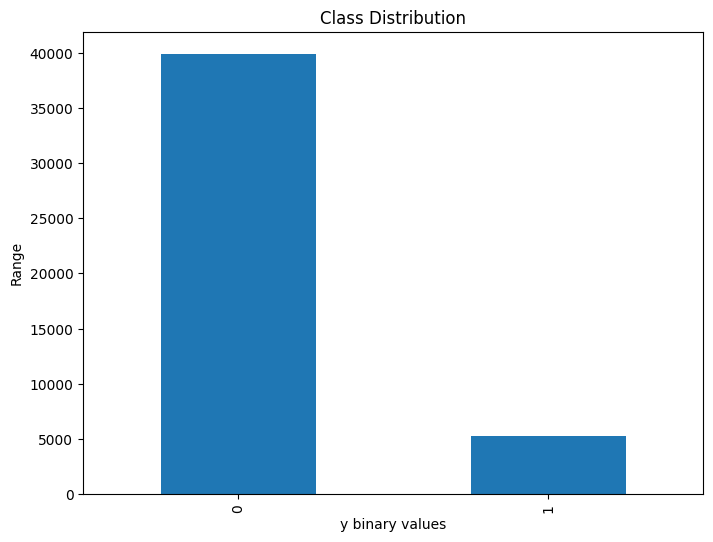

In [8]:
class_counts = predictions.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('y binary values')
plt.ylabel('Range')
plt.title('Class Distribution')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.294455,-0.275762,-0.322559,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.340998,1.368372,0.831451,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.948637,-0.275762,0.831451,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.275727,-0.275762,-2.630580,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,1.995180,1.368372,-2.630580,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=0, shuffle=True)


In [11]:
Train_data = pd.concat([X_train, y_train], axis = 'columns') 
Train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13932,1.512791,NaN,-1.919895,0.831451,-0.13549,-0.231308,-1.118674,-0.436803,-0.713012,-0.697687,0.355209,1.808900,-0.569351,-0.411453,-0.251940,0.444898,1
9894,-0.370689,1.995180,-0.275762,-2.630580,-0.13549,0.110594,-1.118674,-0.436803,1.514306,-0.817845,-0.060073,-0.757841,-0.569351,-0.411453,-0.251940,0.444898,0
39946,-0.559037,1.340998,-1.919895,0.831451,-0.13549,0.479756,0.893915,-0.436803,-0.713012,-1.658950,-0.060073,-0.606400,0.399020,0.557310,0.616335,-2.588321,0
9217,-0.559037,NaN,-0.275762,0.831451,-0.13549,-0.377134,0.893915,2.289359,1.514306,-1.298476,-0.060073,-0.043348,-0.569351,-0.411453,-0.251940,0.444898,0
4124,-0.276515,0.686817,1.368372,-0.322559,-0.13549,-0.341334,0.893915,-0.436803,1.514306,0.383734,-0.475354,-0.466608,-0.569351,-0.411453,-0.251940,0.444898,0


In [12]:
Train_data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,36168.000000,32079.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,-0.001322,0.002199,0.001624,0.003338,0.001042,0.003228,-0.003759,-0.001664,-0.003704,0.000566,0.005455,-0.001607,-0.002861,-0.002155,0.001475,0.000247,0.116844
std,0.999388,0.999426,1.001235,0.996603,1.003781,1.012533,1.000429,0.998470,0.998088,0.999641,1.005109,1.000879,0.997642,0.997762,1.049765,1.000730,0.321238
min,-2.159994,-1.275727,-1.919895,-2.630580,-0.135490,-3.081149,-1.118674,-0.436803,-0.713012,-1.779108,-2.136478,-1.002478,-0.569351,-0.411453,-0.251940,-2.588321,0.000000
25%,-0.747384,-0.948637,-0.275762,-0.322559,-0.135490,-0.423772,-1.118674,-0.436803,-0.713012,-0.938003,-0.475354,-0.602517,-0.569351,-0.411453,-0.251940,0.444898,0.000000
50%,-0.182341,-0.294455,-0.275762,0.831451,-0.135490,-0.299952,0.893915,-0.436803,-0.713012,0.023260,-0.060073,-0.303517,-0.246560,-0.411453,-0.251940,0.444898,0.000000
75%,0.665225,1.013908,1.368372,0.831451,-0.135490,0.023230,0.893915,-0.436803,1.514306,0.624050,0.770490,0.232354,0.076230,-0.411453,-0.251940,0.444898,0.000000
max,5.091402,1.995180,1.368372,0.831451,7.380625,33.094776,0.893915,2.289359,1.514306,1.825628,2.431614,18.094700,19.443647,8.297431,119.135982,0.444898,1.000000


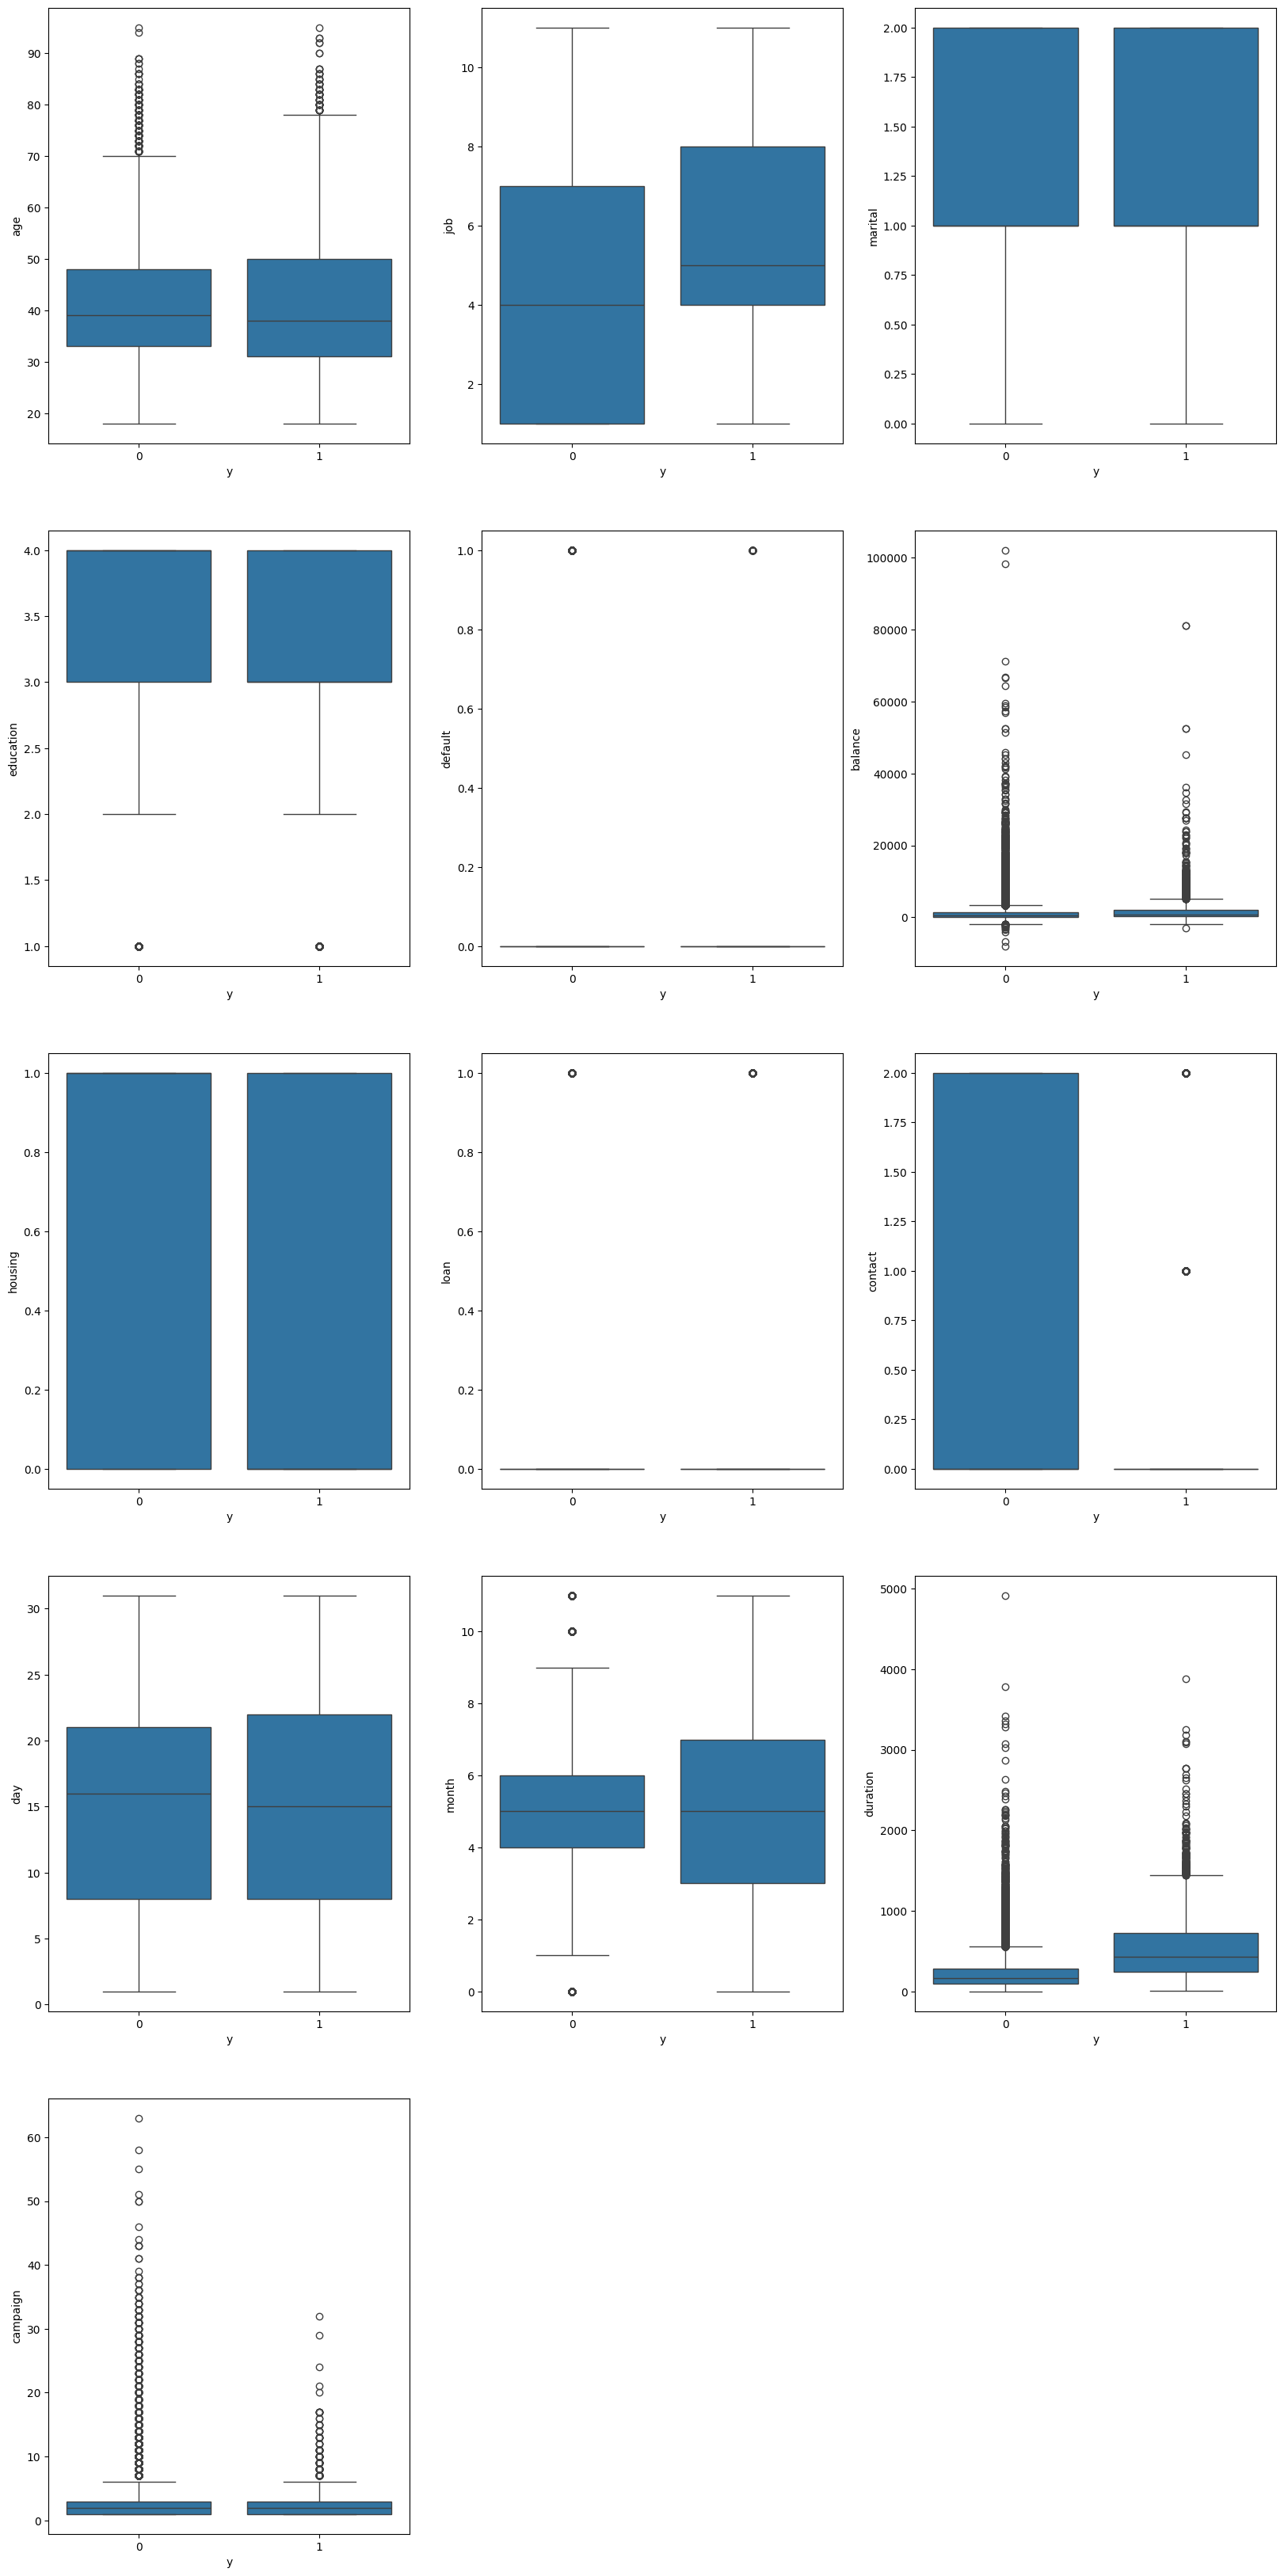

In [13]:
import seaborn as sns
fig, axes = plt.subplots(6, 3, figsize=(20, 50))
for i, ax in enumerate(axes.flat):
    if i < 13:
        sns.boxplot(data=df, x='y', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [14]:
corr_mat = Train_data.corr(method ='pearson', numeric_only=True) 
corr_mat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.058657,-0.404771,-0.168507,-0.015780,0.101171,-0.182736,-0.012504,0.026917,-0.007651,0.088984,-0.009008,0.007592,-0.021758,0.001705,0.002303,0.020049
job,-0.058657,1.000000,0.087322,0.218532,-0.013289,0.012557,-0.124881,-0.028188,-0.099517,0.022968,0.031507,-0.001020,-0.008326,-0.017868,0.007738,0.002611,0.056674
marital,-0.404771,0.087322,1.000000,0.038472,-0.008446,-0.000280,-0.019394,-0.045865,-0.037158,-0.002120,-0.050478,0.009803,-0.007240,0.017385,0.013710,-0.014930,0.044949
education,-0.168507,0.218532,0.038472,1.000000,0.007063,-0.034349,0.077532,0.069031,-0.032990,0.004257,-0.013264,0.001762,-0.019737,0.018892,0.004884,-0.018861,-0.008914
default,-0.015780,-0.013289,-0.008446,0.007063,1.000000,-0.065864,-0.003315,0.076952,0.016297,0.011474,0.016452,-0.008877,0.015138,-0.027563,-0.015797,0.032618,-0.022406
balance,0.101171,0.012557,-0.000280,-0.034349,-0.065864,1.000000,-0.073523,-0.086939,-0.027294,0.004939,0.096550,0.017276,-0.013648,0.001593,0.017274,-0.020105,0.053117
housing,-0.182736,-0.124881,-0.019394,0.077532,-0.003315,-0.073523,1.000000,0.039476,0.191327,-0.024770,-0.171709,0.008077,-0.023805,0.124606,0.036083,-0.100513,-0.141652
loan,-0.012504,-0.028188,-0.045865,0.069031,0.076952,-0.086939,0.039476,1.000000,-0.014313,0.011546,0.022585,-0.013046,0.011932,-0.018893,-0.009579,0.014023,-0.068513
contact,0.026917,-0.099517,-0.037158,-0.032990,0.016297,-0.027294,0.191327,-0.014313,1.000000,-0.029074,-0.177026,-0.018834,0.019129,-0.241774,-0.140174,0.269707,-0.151607
day,-0.007651,0.022968,-0.002120,0.004257,0.011474,0.004939,-0.024770,0.011546,-0.029074,1.000000,0.102672,-0.034683,0.164760,-0.090808,-0.049538,0.081673,-0.030695


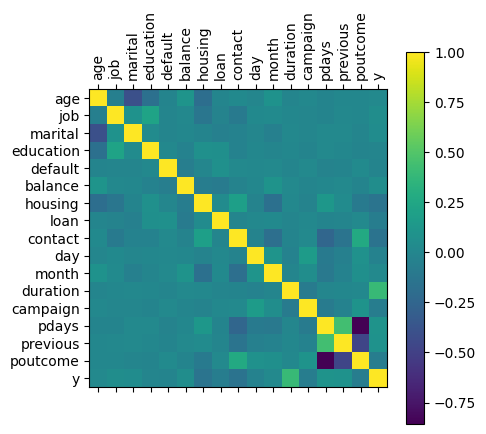

In [15]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [16]:
Train_data.drop(['job'], axis=1, inplace=True)
X_train.drop(['job'], axis=1, inplace=True)
X_test.drop(['job'], axis=1, inplace=True)

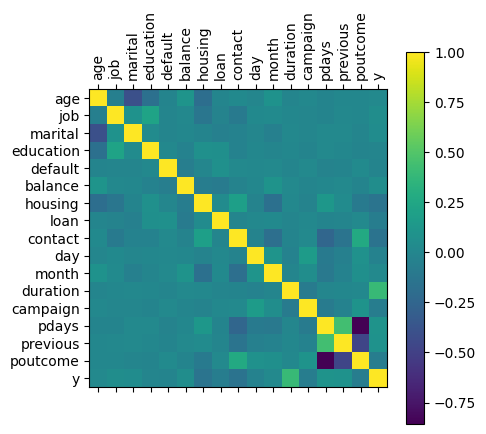

In [17]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [18]:
# Drop the specified columns from Train_data
Train_data.drop(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'], axis=1, inplace=True)

# Drop the specified columns from X_train
X_train.drop(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'], axis=1, inplace=True)

# Drop the specified columns from X_test
X_test.drop(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'], axis=1, inplace=True)


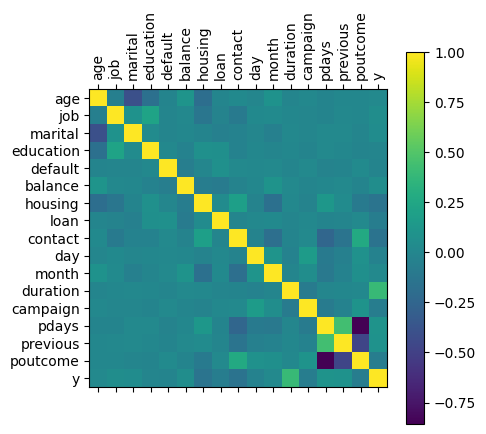

In [19]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy') 

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train) 
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import f1_score, confusion_matrix

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.885
Train confusion matrix: 
 [[31834   108]
 [ 3185  1041]]
Test F1 score:  0.86
Test confusion matrix: 
 [[7822  158]
 [ 873  190]]


In [22]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=8) #Set max depth to 8
model1.fit(X_train, y_train) #Training the model on train data
y_pred_train = model1.predict(X_train) #Make predictions on the training set
y_pred = model1.predict(X_test) #Make predictions on the testing set

F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.867
Train confusion matrix: 
 [[31656   286]
 [ 3471   755]]
Test F1 score:  0.863
Test confusion matrix: 
 [[7873  107]
 [ 875  188]]


In [23]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=12) #Set max depth to 12
model2.fit(X_train, y_train) #Training the model on train data
y_pred_train = model2.predict(X_train) #Make predictions on the training set
y_pred = model2.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.872
Train confusion matrix: 
 [[31676   266]
 [ 3388   838]]
Test F1 score:  0.861
Test confusion matrix: 
 [[7853  127]
 [ 877  186]]


In [24]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight='balanced') #Set class_weight to 'balanced' to counter class imbalance
model3.fit(X_train, y_train) #Training the model on train data
y_pred_train = model3.predict(X_train) #Make predictions on the training set
y_pred = model3.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.861
Train confusion matrix: 
 [[30357  1585]
 [ 3020  1206]]
Test F1 score:  0.858
Test confusion matrix: 
 [[7535  445]
 [ 749  314]]


In [29]:
from sklearn.tree import export_graphviz
import graphviz
# Assuming you have class names 'yes' and 'no' in a list
class_names = ['yes', 'no']

# Export the decision tree as a dot file with correct class_names
dot_data = export_graphviz(model2, out_file=None,
                            feature_names=X_train.columns,
                            class_names=class_names,  # Provide class_names as a list
                            filled=True, rounded=True,
                            special_characters=True)

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)

graph.render("Bank term Tree")

'Bank term Tree.pdf'

In [30]:
from IPython.display import display, FileLink
pdf_file = 'Bank Term Tree.pdf'  # Replace with the actual filename
display(FileLink(pdf_file))


C:\Users\MAYANK PUVVALA\Downloads\jupyter\Bank Term Tree.pdf

In [2]:
import os
import datetime

# Specify the file path to your Jupyter Notebook
file_path = 'DecisionTrees2.ipynb'  # Replace with the actual file path

# Get the date and time the file was created
created_time = datetime.datetime.fromtimestamp(os.path.getctime(file_path))
modified_time = datetime.datetime.fromtimestamp(os.path.getmtime(file_path))

print(f'Created: {created_time}')
print(f'Modified: {modified_time}')


Created: 2023-10-26 02:50:57.019068
Modified: 2023-10-26 04:45:53.273564
